In [1]:
# I have not yet found a way to do a cleaner import of panel...
import sys
sys.path.insert(0, '/export/home/figs/vdesouza/work/Holography-1022/astrohack/src/astrohack')
import panel

In [2]:
# Declare a path to the Amplitude and Deviation images produced by AIPS
path_to_data = '/export/home/figs/vdesouza/work/Holography-1022/aips-modif/data/'
npoints = 43
telescope = 'VLA'
# Create a new Antenna_Surface
vla = panel.Antenna_Surface(path_to_data+'amp.fits',
                            path_to_data+'dev.fits',
                            npoints,telescope)

In [3]:
%%time
# Compile the list of points inside each panel, this is the longest step
vla.compile_panel_points()

CPU times: user 2.93 s, sys: 3.63 ms, total: 2.93 s
Wall time: 2.94 s


In [4]:
%%time 
# Fit surface to get the parameters for each panel
vla.fit_surface()

CPU times: user 310 ms, sys: 465 ms, total: 775 ms
Wall time: 208 ms


In [5]:
%%time
# Apply corrections to create a new antenna surface
vla.correct_surface()

CPU times: user 128 ms, sys: 1.79 ms, total: 130 ms
Wall time: 129 ms


In [6]:
# Compute the gains at a wavelenght as well as the antenna surface RMSes
wave = 1 # Unit may be cm or mm still not clear
ingains, ougains = vla.gains(wave)
inrms, ourms     = vla.get_rms()
print("Gains before correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ingains))
print("RMS before correction: {0:7.3} mm".format(inrms))
print()
print("Gains after correction: Real: {0:7.3} dB, Theoretical: {1:7.3} dB".format(*ougains))
print("RMS after correction: {0:7.3} mm".format(ourms))

Gains before correction: Real:    50.1 dB, Theoretical:    66.3 dB
RMS before correction:   0.647 mm

Gains after correction: Real:    63.2 dB, Theoretical:    66.3 dB
RMS after correction:   0.263 mm


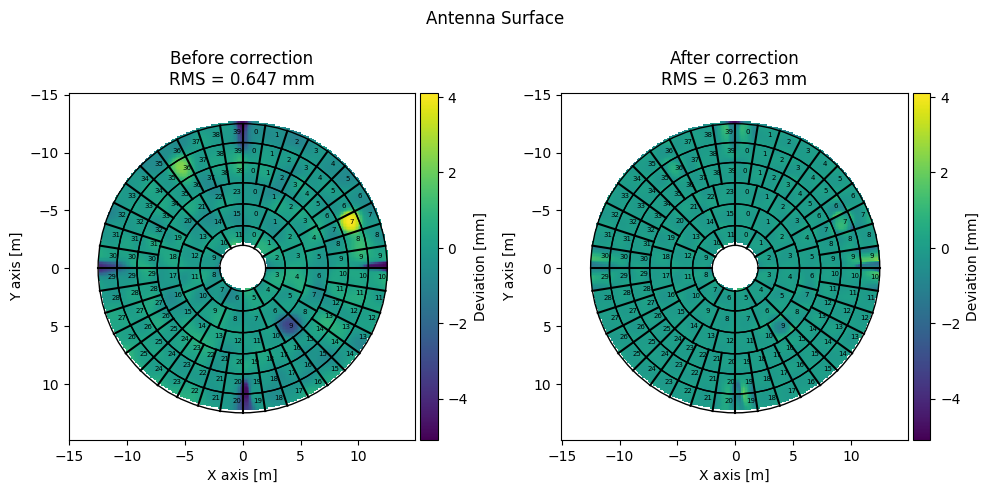

In [7]:
vla.plot_surface()

In [ ]:
# Export products of the panel fitting
vla.export_screw_adjustments(path_to_data+'screw-adjustments.txt')
vla.export_corrected(path_to_data+'corrected-surface.fits')